In [12]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline

In [1]:
from sklearn.datasets import load_boston

In [3]:
print(load_boston().DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [2]:
boston = pd.read_csv('boston.csv')

In [3]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
X = boston.drop('MEDV', axis=1)

In [15]:
y = boston['MEDV'].values

In [16]:
X_rooms = X['RM'].values

Text(0.5,0,'Number of rooms')

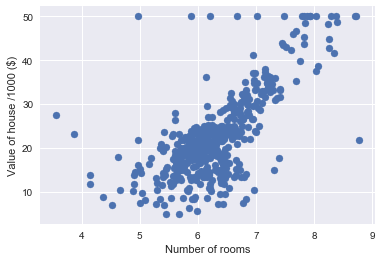

In [17]:
plt.scatter(X_rooms, y)
plt.ylabel('Value of house /1000 ($)')
plt.xlabel('Number of rooms')

In [18]:
X_rooms = X_rooms.reshape(-1, 1)
y = y.reshape(-1, 1)

In [19]:
import numpy as np
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X_rooms, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [21]:
prediction_space = np.linspace(min(X_rooms), max(X_rooms)).reshape(-1, 1)

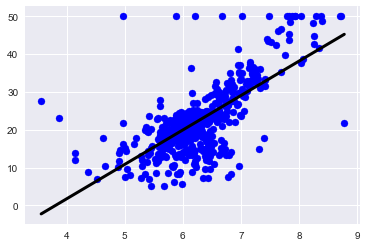

In [22]:
plt.scatter(X_rooms, y, color='blue')
plt.plot(prediction_space, reg.predict(prediction_space),
         color='black', linewidth=3)


# Dasar Regresi Linear

$y = ax + b$

$y$ = target

$x$ = satu fitur

$a, b$ = parameter dari model

Bagiamana memilih $a$ dan $b$

Mencari fungsi error di setiap garis
    - Kemudian meminimalkan error

# Loss Function


<img src="img/loss-function.png" alt="Drawing" width="800" height="800" />

# Regresi Linear Dimensi TInggi

$ y = a_1 x_1 + a_2 x_2 + a_n x_n +  b $

    

In [27]:
X = X.values

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3, random_state=42)
reg_all = linear_model.LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)
reg_all.score(X_test, y_test)

0.7112260057484963

# Cross Validation

- Performa model tergantung dari data yang split
- Model idak mampun mengeneralisasi data
- Solusi Cross Validation


<img src="img/cv.png" alt="Drawing" width="800" height="800" />

- 5 folds = 5 folds CV
- 10 folds = 5 folds CV
- k folds = k folds CV

In [29]:
from sklearn.model_selection import cross_val_score
reg = linear_model.LinearRegression()
cv_results = cross_val_score(reg, X, y, cv=5)
print(cv_results)

[ 0.63919994  0.71386698  0.58702344  0.07923081 -0.25294154]


In [30]:
np.mean(cv_results)

0.3532759243958677